## Histogram Equalization

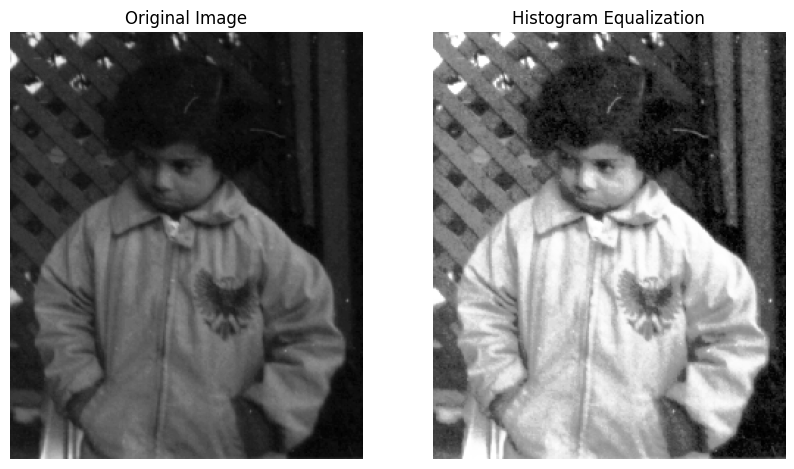

In [6]:
from mip.display.image import show, read, subplot_images

import numpy as np



def hist_eq(img):
    """
    Histogram Equalization
    ----------------------

    Formula: 
    * Image: f(x, y)
    * Image Size: h x w
    * Number of Pixels: S = h x w
    * Histogram: h(i) = Number of Pixels with Intensity i
    * Probability: p(i) = h(i) / S
    * Cumulative Probability: c(i) = sum([p(i) for i in range(0, i)])
    * New Intensity: z(i) = 255 x c(i)
    """
    h, w = img.shape
    s = h * w
    out = img.copy()

    hist = np.array([np.sum(img == i)/s for i in range(256)])
    cdf = np.cumsum(hist)
    z = 255 * cdf

    for i in range(256):
        out[img == i] = z[i]
    return out, hist, cdf

img = read(r"D:\Educational\MSc\MIP\assets\pout.png", 'GRAY')

hist_img, hist, cdf = hist_eq(img)

subplot_images([img, hist_img], titles=['Original Image', 'Histogram Equalization'])

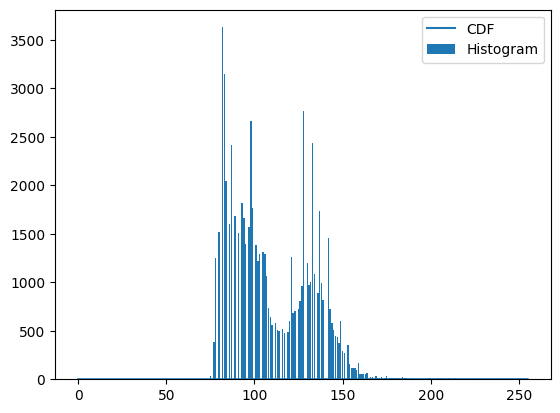

In [15]:
import matplotlib.pyplot as plt

plt.bar(np.arange(0, 256), hist*img.shape[0]*img.shape[1], label='Histogram')
plt.plot(cdf, label='CDF')
plt.legend()
plt.show()

0.9999999999999991